In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

In [2]:
# include points from either side of the intense point
MS1_PEAK_DELTA = 0.1

In [65]:
experiment_base_dir = '/Users/darylwilding-mcbride/Downloads/experiments'
EXPERIMENT_NAME = 'P3856'
RUN_NAME = 'P3856_YHE211_1_Slot1-1_1_5104'
precursor_id = 1000

#### download the precursor cuboid
gsutil cp gs://inbox-stage/exp-P3856-run-P3856_YHE211_1_Slot1-1_1_5104-precursor-22610-of-52464.zip /data2/experiments/P3856/precursor-cuboids/P3856_YHE211_1_Slot1-1_1_5104
#### generate the CSVs
python -u ./open-path/pda/process-precursor-cuboid.py -eb /data2/experiments -en P3856 -rn P3856_YHE211_1_Slot1-1_1_5104 -pid 22610 -ini ./open-path/pda/pasef-process-short-gradient.ini -tot 52464
#### download the features that were derived prior to recalibration (they had the flag for mono adjustment)
scp -i \~/Documents/AWS\ keys/dwm-protlab.pem ubuntu@13.238.185.213:~/experiment-features.pkl ~/Downloads/experiments/P3856/features/
#### download the precursor cuboids to the local machine
scp -r -i ~/Documents/AWS\ keys/dwm-protlab.pem ubuntu@13.238.185.213:/data2/experiments/P3856/precursor-cuboids/ ~/Downloads/experiments/P3856/precursor-cuboids/

In [66]:
# inspect the features for this precursor
features_df = pd.read_pickle('{}/{}/features/experiment-features.pkl'.format(experiment_base_dir, EXPERIMENT_NAME))

In [67]:
features_df[(features_df.precursor_id == precursor_id)]

,monoisotopic_mz,charge,intensity,intensity_full_rt_extent,scan_apex,scan_curve_fit,scan_lower,scan_upper,rt_apex,rt_curve_fit,rt_lower,rt_upper,precursor_id,envelope,feature_id,candidate_phr_error,mono_adjusted,original_phr_error,original_phr,monoisotopic_mass
95150,607.789175,2,34799.0,84296,822.76,True,808.66,836.86,456.91,True,446.91,466.91,1000,"((607.7875, 17619.00), (608.2890, 11221.00), (...",100001,NaN,False,-0.0220516,0.636869,1213.563749
95151,606.798859,2,2019.0,1395,833.32,False,813.32,853.32,457.91,False,447.91,467.91,1000,"((606.7935, 1019.00), (607.3003, 1000.00), (60...",100002,-0.316447,False,0.509418,0.981354,1211.583118


In [68]:
before_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/{}-{}-ms1-before-intensity-descent-precursor-{}.csv'.format(EXPERIMENT_NAME, RUN_NAME, precursor_id))
after_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/{}-{}-ms1-after-intensity-descent-precursor-{}.csv'.format(EXPERIMENT_NAME, RUN_NAME, precursor_id))


In [69]:
before_df['normalised_intensity'] = before_df.intensity / before_df.intensity.max()
after_df['normalised_intensity'] = after_df.intensity / after_df.intensity.max()

In [70]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

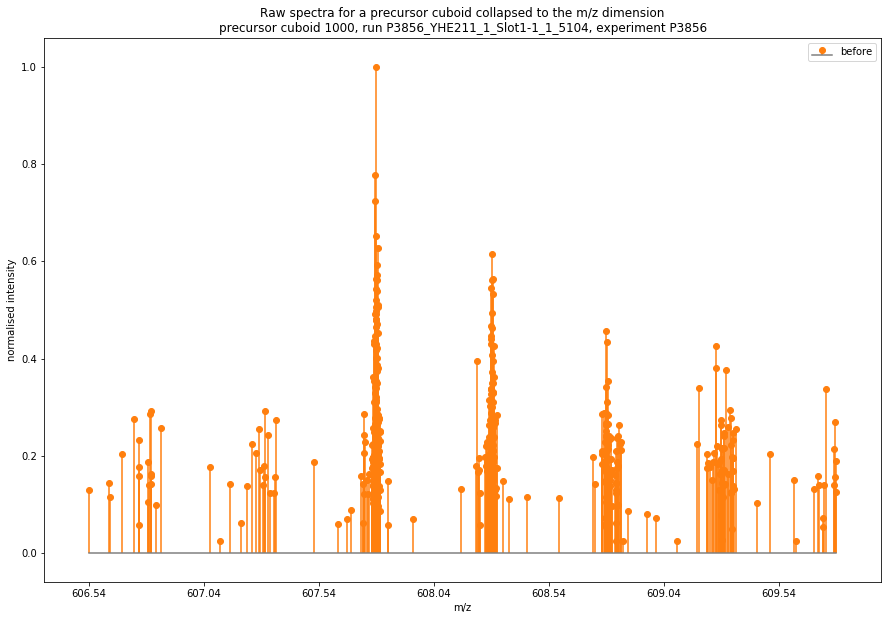

In [73]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(before_df.mz, before_df.normalised_intensity, use_line_collection=True, label='before')
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)
plt.xticks(np.arange(before_df.mz.min(),before_df.mz.max(),0.5))

# plt.xlim((608.14,608.47))
# plt.ylim((-3000,3000))

plt.margins(0.06)
plt.legend(loc='best')
plt.title('Raw spectra for a precursor cuboid collapsed to the m/z dimension\nprecursor cuboid {}, run {}, experiment {}'.format(precursor_id, RUN_NAME, EXPERIMENT_NAME))
plt.show()

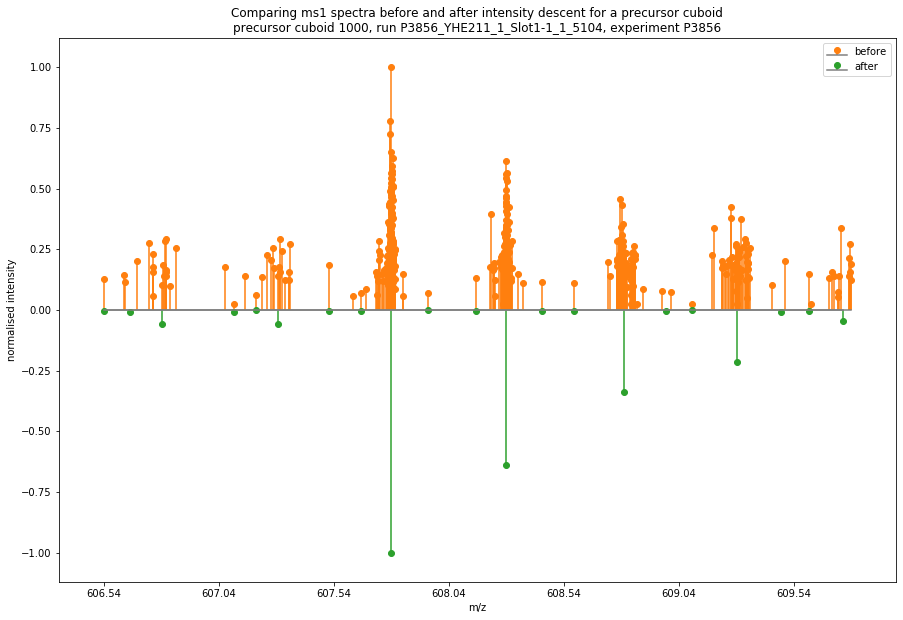

In [75]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(before_df.mz, before_df.normalised_intensity, use_line_collection=True, label='before')
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

markerline, stemlines, baseline = ax.stem(after_df.mz, -after_df.normalised_intensity, use_line_collection=True, label='after')
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)
plt.xticks(np.arange(before_df.mz.min(),before_df.mz.max(),0.5))

# plt.xlim((608.14,608.47))
# plt.ylim((-3000,3000))

plt.margins(0.06)
plt.legend(loc='best')
plt.title('Comparing ms1 spectra before and after intensity descent for a precursor cuboid\nprecursor cuboid {}, run {}, experiment {}'.format(precursor_id, RUN_NAME, EXPERIMENT_NAME))
plt.show()


In [86]:
# look at the points in the region around a maximum
max_intensity_idx = before_df[(before_df.mz >= 608.14) & (before_df.mz <= 608.49)].intensity.idxmax()

In [87]:
mz_upper = before_df.loc[max_intensity_idx].mz + MS1_PEAK_DELTA
mz_lower = before_df.loc[max_intensity_idx].mz - MS1_PEAK_DELTA

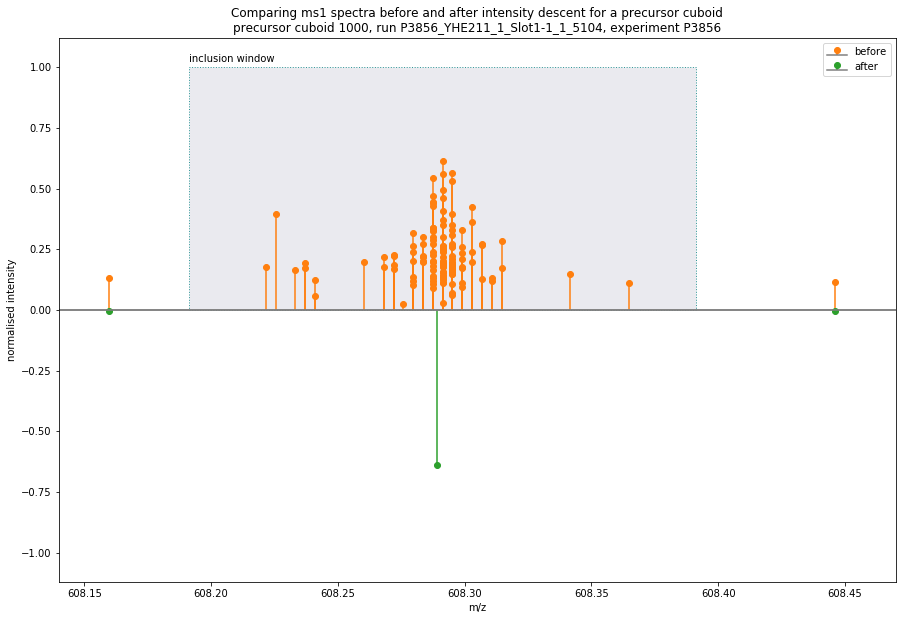

In [88]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(before_df.mz, before_df.normalised_intensity, use_line_collection=True, label='before')
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

markerline, stemlines, baseline = ax.stem(after_df.mz, -after_df.normalised_intensity, use_line_collection=True, label='after')
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)
# plt.xticks(np.arange(before_df.mz.min(),before_df.mz.max(),0.05))

plt.xlim((608.14,608.47))
# plt.ylim((-200,250))

rect = patches.Rectangle((mz_lower,0),MS1_PEAK_DELTA*2,1.0,linewidth=1,linestyle=':',edgecolor=(0.2,0.6,0.6,1.0),facecolor=(0.2,0.2,0.4,0.1),fill=True)
ax.add_patch(rect)
plt.text(mz_lower, 1.02,'inclusion window')

plt.margins(0.06)
plt.legend(loc='best')
plt.title('Comparing ms1 spectra before and after intensity descent for a precursor cuboid\nprecursor cuboid {}, run {}, experiment {}'.format(precursor_id, RUN_NAME, EXPERIMENT_NAME))
plt.show()

#### features found in the cuboid with deconvolution

In [89]:
after_deconvolution_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/{}-{}-ms1-after-deconvolution-precursor-{}.csv'.format(EXPERIMENT_NAME, RUN_NAME, precursor_id))

In [90]:
after_deconvolution_df['normalised_intensity'] = after_deconvolution_df.intensity / after_deconvolution_df.intensity.max()

In [91]:
after_deconvolution_df

,monoisotopic_mz,charge,intensity,intensity_full_rt_extent,scan_apex,scan_curve_fit,scan_lower,scan_upper,rt_apex,rt_curve_fit,rt_lower,rt_upper,precursor_id,envelope,feature_id,normalised_intensity
0,607.789175,2,34799,84296,822.76,True,808.66,836.86,456.91,True,446.91,466.91,1000,"[(607.7875, 17619.00), (608.2890, 11221.00), (...",100001,1.000000
1,606.798859,2,2019,1395,833.32,False,813.32,853.32,457.91,False,447.91,467.91,1000,"[(606.7935, 1019.00), (607.3003, 1000.00), (60...",100002,0.058019


In [92]:
isotopes_l = []
for idx,row in enumerate(after_deconvolution_df.itertuples()):
    envelope = eval(row.envelope)
    feature_id = row.feature_id
    for isotope in envelope:
        isotopes_l.append((feature_id,)+isotope)
df = pd.DataFrame(isotopes_l, columns=['feature_id','mz','intensity'])
df['normalised_intensity'] = df.intensity / df.intensity.max()

In [93]:
df

,feature_id,mz,intensity,normalised_intensity
0,100001,607.7875,17619.0,1.000000
1,100001,608.2890,11221.0,0.636869
2,100001,608.8007,5959.0,0.338214
3,100002,606.7935,1019.0,0.057835
4,100002,607.3003,1000.0,0.056757
5,100002,607.7963,1.0,0.000057


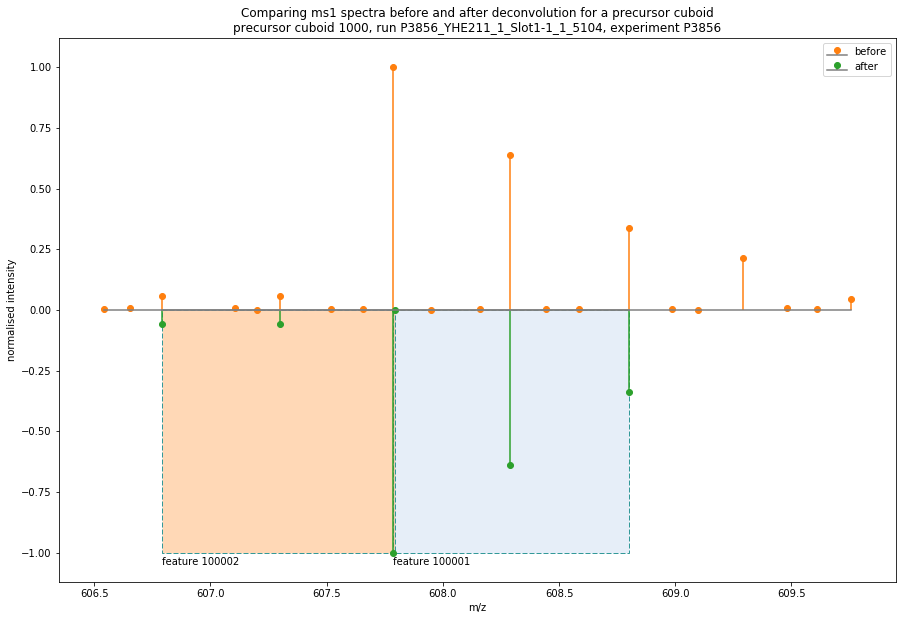

In [100]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(after_df.mz, after_df.normalised_intensity, use_line_collection=True, label='before')
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

markerline, stemlines, baseline = ax.stem(df.mz, -df.normalised_intensity, use_line_collection=True, label='after')
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)
# plt.xticks(np.arange(after_deconvolution_df.mz.min(),after_deconvolution_df.mz.max(),0.05))

# plt.xlim((608.14,608.47))
# plt.ylim((-200,250))

for idx,row in enumerate(after_deconvolution_df.itertuples()):
    envelope = eval(row.envelope)
    feature_id = row.feature_id
    env_width = envelope[-1][0] - envelope[0][0]
    rect = patches.Rectangle((envelope[0][0],0),env_width,-1.0,linewidth=1,linestyle=(0,(5,2)),edgecolor=(0.2,0.6,0.6,1.0),facecolor=tuple(i/255. for i in tableau20[idx+1])+(0.3,),fill=True)
    ax.add_patch(rect)
    plt.text(envelope[0][0], -1.05, 'feature {}'.format(feature_id))

plt.margins(0.06)
plt.legend(loc='best')
plt.title('Comparing ms1 spectra before and after deconvolution for a precursor cuboid\nprecursor cuboid {}, run {}, experiment {}'.format(precursor_id, RUN_NAME, EXPERIMENT_NAME))
plt.show()

In [95]:
# the derived feature attributes
features_df[(features_df.precursor_id == precursor_id)]

,monoisotopic_mz,charge,intensity,intensity_full_rt_extent,scan_apex,scan_curve_fit,scan_lower,scan_upper,rt_apex,rt_curve_fit,rt_lower,rt_upper,precursor_id,envelope,feature_id,candidate_phr_error,mono_adjusted,original_phr_error,original_phr,monoisotopic_mass
95150,607.789175,2,34799.0,84296,822.76,True,808.66,836.86,456.91,True,446.91,466.91,1000,"((607.7875, 17619.00), (608.2890, 11221.00), (...",100001,NaN,False,-0.0220516,0.636869,1213.563749
95151,606.798859,2,2019.0,1395,833.32,False,813.32,853.32,457.91,False,447.91,467.91,1000,"((606.7935, 1019.00), (607.3003, 1000.00), (60...",100002,-0.316447,False,0.509418,0.981354,1211.583118


#### only looking at one of the features

In [96]:
feature_id = 100001

In [97]:
after_deconvolution_df[(after_deconvolution_df.feature_id == feature_id)].iloc[0]

monoisotopic_mz                                                       607.789
charge                                                                      2
intensity                                                               34799
intensity_full_rt_extent                                                84296
scan_apex                                                              822.76
scan_curve_fit                                                           True
scan_lower                                                             808.66
scan_upper                                                             836.86
rt_apex                                                                456.91
rt_curve_fit                                                             True
rt_lower                                                               446.91
rt_upper                                                               466.91
precursor_id                                                    

In [98]:
adjusted_envelope = features_df[(features_df.feature_id == feature_id)].iloc[0].envelope

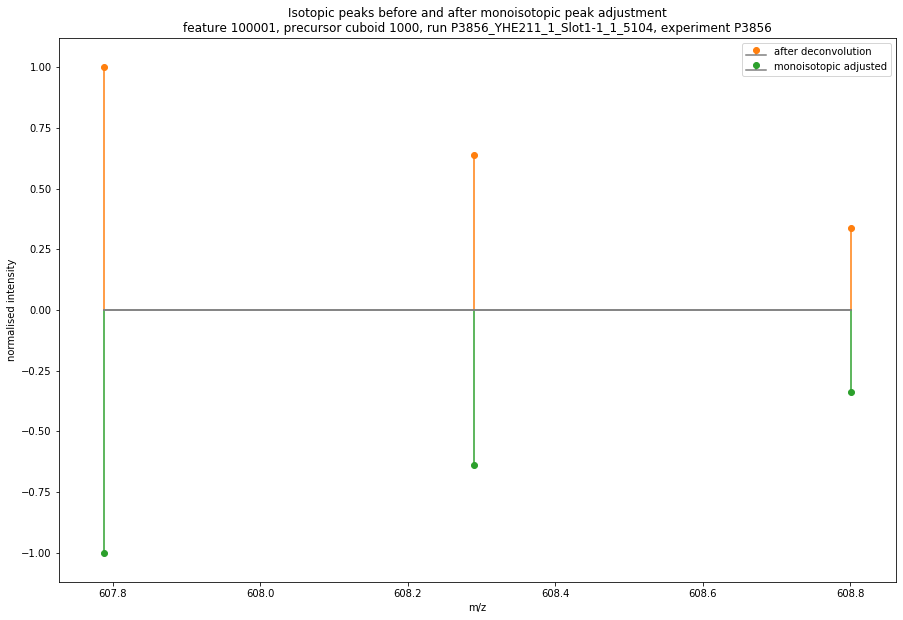

In [99]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

row = after_deconvolution_df[(after_deconvolution_df.feature_id == feature_id)].iloc[0]
envelope = eval(row.envelope)
env_width = envelope[-1][0] - envelope[0][0]

isotopes_l = []
for i in envelope:
    isotopes_l.append((i[0], i[1]))
isotopes_df = pd.DataFrame(isotopes_l, columns=['mz','intensity'])
isotopes_df['normalised_intensity'] = isotopes_df.intensity / isotopes_df.intensity.max()

adjusted_isotopes_l = []
for i in adjusted_envelope:
    adjusted_isotopes_l.append((i[0], i[1]))
adjusted_isotopes_df = pd.DataFrame(adjusted_isotopes_l, columns=['mz','intensity'])
adjusted_isotopes_df['normalised_intensity'] = adjusted_isotopes_df.intensity / adjusted_isotopes_df.intensity.max()

markerline, stemlines, baseline = ax.stem(isotopes_df.mz, isotopes_df.normalised_intensity, use_line_collection=True, label='after deconvolution')
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

markerline, stemlines, baseline = ax.stem(adjusted_isotopes_df.mz, -adjusted_isotopes_df.normalised_intensity, use_line_collection=True, label='monoisotopic adjusted')
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)
# plt.xticks(np.arange(df.mz.min(),df.mz.max(),0.5))

# plt.xlim((608.14,608.47))
# plt.ylim((-3000,3000))

plt.margins(0.06)
plt.legend(loc='best')
plt.title('Isotopic peaks before and after monoisotopic peak adjustment\nfeature {}, precursor cuboid {}, run {}, experiment {}'.format(feature_id, precursor_id, RUN_NAME, EXPERIMENT_NAME))
plt.show()